### Decision Trees With sklearn library
I will explore Bank Marketing Data Set that can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The goal is to predict whether or not the person will agree to subscribe a term deposite. 

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



### Data loading and exploration

In [2]:
df = pd.read_csv("/Users/angelika/Desktop/bank-additional-full.csv", sep = ';')

In [3]:
df.sample(20).transpose()

,15787,28604,5094,21460,28878,2058,4770,24375,24923,10795,22581,34938,18501,12857,13716,31526,25557,7686,8015,2929
age,41,30,50,31,31,33,60,52,34,55,39,34,52,25,46,38,35,57,35,33
job,technician,admin.,admin.,admin.,student,services,technician,management,technician,housemaid,admin.,blue-collar,blue-collar,services,blue-collar,management,admin.,retired,technician,admin.
marital,single,married,divorced,single,single,married,divorced,divorced,single,married,married,married,married,married,single,married,married,married,married,married
education,university.degree,university.degree,basic.9y,university.degree,unknown,high.school,professional.course,university.degree,university.degree,university.degree,university.degree,basic.9y,basic.9y,high.school,basic.9y,unknown,university.degree,high.school,professional.course,high.school
default,no,no,no,unknown,unknown,unknown,unknown,no,no,no,no,no,no,no,unknown,no,no,unknown,no,no
housing,yes,no,no,no,yes,no,yes,yes,yes,yes,no,no,yes,no,no,no,yes,no,no,yes
loan,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,yes
contact,cellular,cellular,telephone,cellular,cellular,telephone,telephone,cellular,cellular,telephone,cellular,cellular,cellular,cellular,cellular,telephone,cellular,telephone,telephone,telephone
month,jul,apr,may,aug,apr,may,may,nov,nov,jun,aug,may,jul,jul,jul,may,nov,may,jun,may
day_of_week,mon,wed,fri,tue,thu,mon,wed,mon,tue,tue,fri,fri,thu,tue,thu,thu,wed,fri,mon,wed


In [4]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

My target variable data is heavily unbalanced. Since I have enough data for building a successful decision tree model, I am going to downsample the data.

In [5]:
from sklearn.utils import resample


df_majority = df[df.y=="no"]
df_minority = df[df.y=="yes"]
 

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=4640,     
                                 random_state=123) 
 

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

df_downsampled.y.value_counts()

no     4640
yes    4640
Name: y, dtype: int64

#### Splitting the data into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_downsampled, df_downsampled.y, test_size=0.2)
X_test.to_csv('test_data.zip', index=False)

In [7]:
df_downsampled= X_train

In [8]:
df_downsampled=df_downsampled.reset_index(drop=True)
df_downsampled.y = df_downsampled.y.map(dict(yes=1, no=0))

In [9]:
df_downsampled.y.describe()

count    7424.000000
mean        0.501751
std         0.500031
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: y, dtype: float64

Now that my data is balanced I can further explore it by summarizing. 

#### Summarizing  agreement  by age

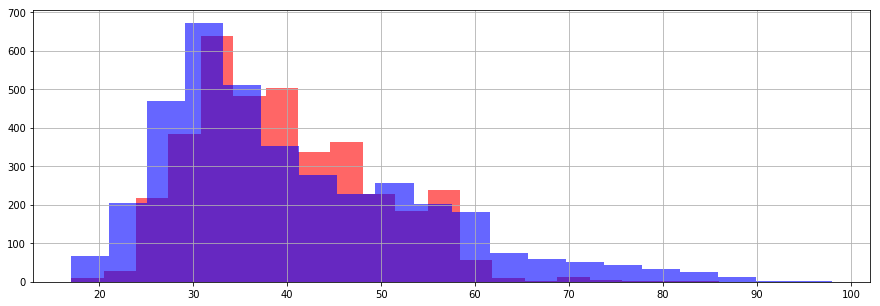

In [10]:
df_downsampled.loc[(df_downsampled.y==0), 'age'].hist(bins=20, alpha=.6, color='red', figsize=[15, 5])
df_downsampled.loc[(df_downsampled.y==1), 'age'].hist(bins=20, alpha=.6, color='blue')


#### Summarizing agreement by job

In [11]:
df_downsampled[['job', 'y']].groupby('job').agg(['mean', 'count'])

y      
                   mean count
job                          
admin.         0.529612  2060
blue-collar    0.376737  1367
entrepreneur   0.411523   243
housemaid      0.482558   172
management     0.517034   499
retired        0.758696   460
self-employed  0.480000   250
services       0.403400   647
student        0.788321   274
technician     0.503431  1166
unemployed     0.510917   229
unknown        0.491228    57

#### Summarizing agreement by education

In [12]:
df_downsampled[['education', 'y']].groupby(['education']).agg(['mean', 'count'])

y      
                         mean count
education                          
basic.4y             0.491994   687
basic.6y             0.420904   354
basic.9y             0.406688   927
high.school          0.481352  1716
illiterate           0.750000     4
professional.course  0.520811   937
university.degree    0.550903  2436
unknown              0.556474   363

#### Summarizing agreement by day of week

In [13]:
df_downsampled[['day_of_week', 'y']].groupby(['day_of_week']).agg(['mean', 'count'])

y      
                 mean count
day_of_week                
fri          0.494569  1381
mon          0.465670  1471
thu          0.529301  1587
tue          0.514483  1450
wed          0.502280  1535

#### Find and Count Nulls

In [14]:
df_downsampled.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Data Cleaning and Feature Engineering

Since `sklearn` will only accept numeric or boolean variables to train our decision tree, I will transform some of the variables to address that. 
I will create booleans for martial status, housing, loan, way of contact (cellular or not), university degree, and whether a contacted person is student or retired. 


In [15]:
# marital booleans
for k in df_downsampled.marital.unique():
    if type(k)==str:
        df_downsampled['marital_' + k] = (df_downsampled.marital==k)*1
        
# housinh boolean
df_downsampled['has_housing'] = (df_downsampled.housing=='yes')*1
    
# loan boolean
df_downsampled['has_loan'] = (df_downsampled.loan=='yes')*1    

# contact boolean
df_downsampled['is_cellular'] = (df_downsampled.contact=='cellular')*1

# univercity degree boolean
df_downsampled['has_udegree'] = (df_downsampled.education=='university.degree')*1    

# student boolean
df_downsampled['is_student'] = (df_downsampled.job=='student')*1    

# retired boolean
df_downsampled['is_retired'] = (df_downsampled.job=='retired')*1    

# days of week from string to int
df_downsampled.day_of_week = df_downsampled.day_of_week.map(dict(mon=0, tue=1, wed=2,thu=3,fri=4))

In [16]:
df_downsampled.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_married,marital_divorced,marital_single,marital_unknown,has_housing,has_loan,is_cellular,has_udegree,is_student,is_retired
2700,22,blue-collar,single,basic.9y,no,yes,yes,cellular,jul,0,...,0,0,1,0,1,1,1,0,0,0
547,39,management,married,university.degree,no,yes,yes,cellular,nov,3,...,1,0,0,0,1,1,1,1,0,0
3593,37,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,2,...,1,0,0,0,1,0,0,0,0,0
583,36,admin.,married,professional.course,no,no,no,cellular,aug,0,...,1,0,0,0,0,0,1,0,0,0
886,18,student,single,unknown,no,yes,no,cellular,sep,4,...,0,0,1,0,1,0,1,0,1,0
432,43,blue-collar,single,basic.9y,no,yes,no,telephone,may,2,...,0,0,1,0,1,0,0,0,0,0
6578,27,blue-collar,married,basic.9y,no,no,no,cellular,may,0,...,1,0,0,0,0,0,1,0,0,0
6652,33,technician,married,university.degree,no,no,no,cellular,sep,2,...,1,0,0,0,0,0,1,1,0,0
7299,45,admin.,married,high.school,no,yes,no,cellular,nov,0,...,1,0,0,0,1,0,1,0,0,0
3020,55,housemaid,divorced,university.degree,no,yes,no,telephone,jun,3,...,0,1,0,0,1,0,0,1,0,0


All variables are ready to go. Next step is to assign my clean and model ready features to a list so I can call them easily while training the model.

In [17]:
features = ['age', 'marital_single', 'marital_married','marital_divorced', 'day_of_week',
            'has_housing', 'has_loan', 'is_cellular', 'has_udegree', 'is_student', 'is_retired', 'previous']

valid = df_downsampled[features].notna().all(axis=1)
print(len(df_downsampled), sum(valid))


7424 7424


### Building a Decision Tree
Now that I have variables in good shape, I can start modeling. Let's train a simple tree and see how it performs.


In [18]:
dtree=DecisionTreeClassifier(
    criterion='entropy', 
    random_state=20181105, 
    max_depth=5,
    min_samples_split=2, 
    #min_samples_leaf=1, 
    #max_features=None, 
    #max_leaf_nodes=None, 
)

dtree.fit(df_downsampled[features], df_downsampled['y'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20181105, splitter='best')

In [19]:
!pip install -q pydot

# Used for visualizing trees, but not strictly necessary
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus

You are using pip version 18.0, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Visualizing a tree

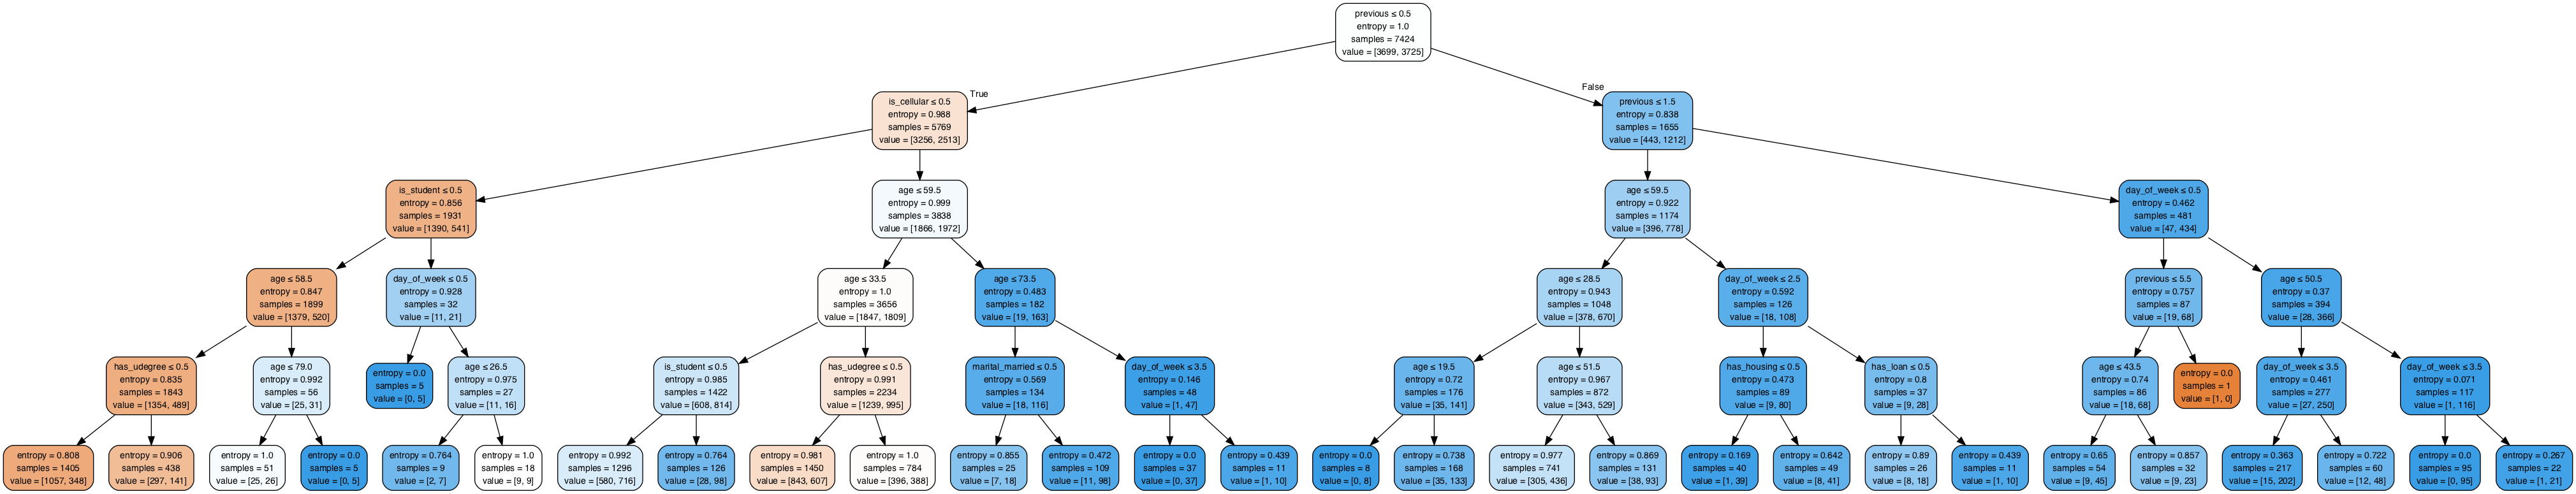

In [20]:
dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                feature_names=features,
                special_characters=True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Based on the desition tree we can see that if:
    * Person was previously contacted several times (previous >= 1.5)
    * Person's age is less than 50 (age <= 50.5)
    * Person was contacted on Tuesday, Wed, or Thursday ( 0.5 <= day_of_week <= 3.5 where 0 is Monday)
The probability of agreement is 93 % (202 out of 217 people).
On the other hand if:
    * Person was not previously contacted (previous <= 0.5)
    * Person was contacted not by cell phone but house phone (is_cellular <= 0.5)
    * Person is less than 58.5 years old (age <= 58.5)
    * Person does not have a univercity degree and not a student (has udegree <= 0.5 & is_student <=0.5)
The probablity of disagreement is 75% (1057 out of 1405).

### Calculating metrics from in-sample performance

In [21]:
pred_agree = dtree.predict(df_downsampled[features])

print(confusion_matrix(df_downsampled.y, pred_agree), '\n')
print('Accuracy:   %0.3f' % accuracy_score(df_downsampled.y, pred_agree))
print('Precision:  %0.3f' % precision_score(df_downsampled.y, pred_agree))
print('Recall:     %0.3f' % recall_score(df_downsampled.y, pred_agree))


[[2603 1096]
 [1493 2232]] 

Accuracy:   0.651
Precision:  0.671
Recall:     0.599


The results are not the best but acceptable. The good thing is that True Positives and True negatives are balanced. It indicates that our model is doing a good job at predicting both classes.  

Since the results are only moderate I will run linear model or more specifically Logistic Regression for comparison.


### Logistic Regression

In [22]:
logreg = LogisticRegression(random_state=20191021, solver='lbfgs')
logreg.fit(df_downsampled[features], df_downsampled.y)
pred_agree = logreg.predict(df_downsampled[features])

print(confusion_matrix(df_downsampled.y, pred_agree), '\n')
print('Accuracy:   %0.3f' % accuracy_score(df_downsampled.y, pred_agree))
print('Precision:  %0.3f' % precision_score(df_downsampled.y, pred_agree))
print('Recall:     %0.3f' % recall_score(df_downsampled.y, pred_agree))


[[2540 1159]
 [1527 2198]] 

Accuracy:   0.638
Precision:  0.655
Recall:     0.590


Seems like Desition Tree is doing slightly better.

### Selecting Hyperparameters with Cross Validation
First, I will use the KFold function from sci-kit learn to generate five folds for cross validation. It can show the balance of the agreement rate among the different folds to get a better idea of what's going on.
Next, I will train a different decision tree model against each of the folds and track its performance.
Finally, I will track average cv metrics for different values of our hyperparameters.

In [75]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5, random_state=20181105)

In [76]:
# Print the number of observations and agreement rate  for 
for train_indices, test_indices in k_fold.split(df_downsampled[features]):
     print('Train: n=%i, a_rate=%0.2f | test: n=%i, a_rate=%0.2f ' % 
           (df_downsampled.loc[train_indices, 'y'].count(), 
            df_downsampled.loc[train_indices, 'y'].mean(), 
            df_downsampled.loc[test_indices, 'y'].count(),
            df_downsampled.loc[test_indices, 'y'].mean(),
           )
          )


Train: n=5939, a_rate=0.50 | test: n=1485, a_rate=0.51 
Train: n=5939, a_rate=0.50 | test: n=1485, a_rate=0.50 
Train: n=5939, a_rate=0.50 | test: n=1485, a_rate=0.53 
Train: n=5939, a_rate=0.51 | test: n=1485, a_rate=0.48 
Train: n=5940, a_rate=0.50 | test: n=1484, a_rate=0.50 


Creating a function to fit the model and return relevant metrics makes it easy to track cross validation performance over different values of our parameters.

In [25]:
def get_cv_results(classifier):
    results = []
    for train, test in k_fold.split(df_downsampled[features]):
        classifier.fit(df_downsampled.loc[train, features], df_downsampled.loc[train, 'y'])
        y_predicted = classifier.predict(df_downsampled.loc[test, features])
        accuracy = accuracy_score(df_downsampled.loc[test, 'y'], y_predicted)
        results.append(accuracy)
    return np.mean(results), np.std(results)

We are ready to track mean and variance of accuracy for different values of the minimum samples per split.

In [26]:
hp_values = range(10,200, 10)
all_mu = []
all_sigma = []

for m in hp_values:

    dtree=DecisionTreeClassifier(
        criterion='entropy', 
        random_state=20180408, 
        min_samples_split=m, 
        
    )



    
    mu, sigma = get_cv_results(dtree)
    all_mu.append(mu)
    all_sigma.append(sigma)
    
    print(m, mu, sigma)
    
    
 

10 0.591322842077559 0.01204269331067004
20 0.6053313911804478 0.01090066509048361
30 0.6103167342789984 0.0052955454079699205
40 0.6155698948151779 0.005942074046932779
50 0.6143578643578643 0.007930675484545097
60 0.6205544211204588 0.007212696190952365
70 0.6298492562643506 0.009740490713051999
80 0.6316009148084619 0.010605982427259906
90 0.6290417199851162 0.009215894444028492
100 0.6336215706027026 0.008617986085505817
110 0.6328129452657755 0.005955859211335802
120 0.6337560692277674 0.0077676110205161675
130 0.6371234356140016 0.007630716269319518
140 0.637661883888299 0.007400920958105961
150 0.6402210787116447 0.009661952551714462
160 0.6429151351792861 0.014569838996372486
170 0.643453764963199 0.013669552812809235
180 0.643588445097879 0.01399004238475406
190 0.6423759608665269 0.013624743915854982


Text(0.5,0,'Minimum Samples Per Leaf')

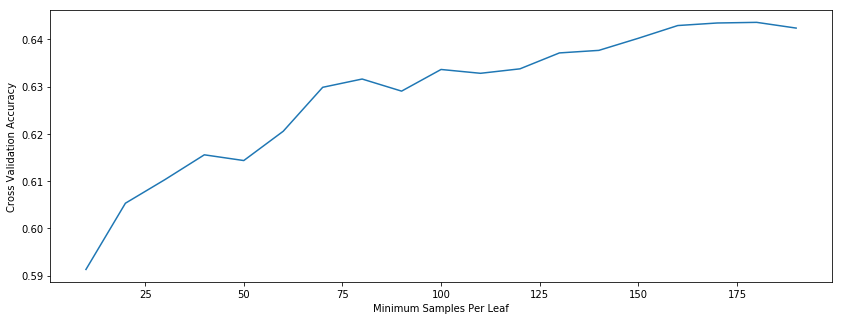

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(hp_values, all_mu)
plt.ylabel('Cross Validation Accuracy')
plt.xlabel('Minimum Samples Per Leaf')

Text(0.5,0,'Minimum Samples Per Leaf')

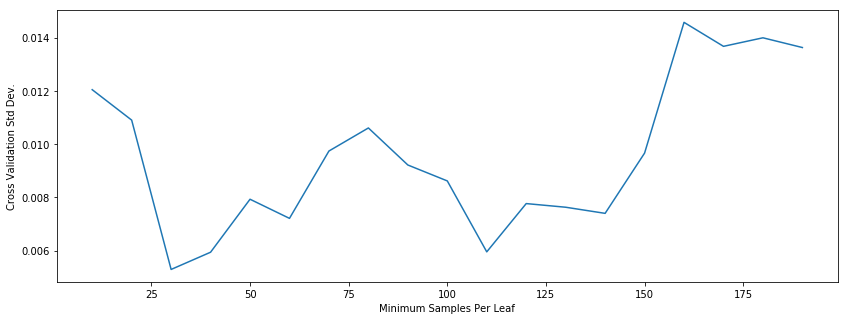

In [28]:
plt.figure(figsize=(14, 5))
plt.plot(hp_values, all_sigma)
plt.ylabel('Cross Validation Std Dev.')
plt.xlabel('Minimum Samples Per Leaf')

Quick look at how these results compare to logistic regression.

In [29]:
logreg = LogisticRegression(random_state=20181105, solver='lbfgs')
get_cv_results(logreg)

(0.6332146260448147, 0.01681518121137425)

### Selecting Our Model and Applying It to Our Test Set
It seems like min_samples_split=160 might provide our best fit. We can train our best model using that value.
Then we can double check and see if our model makes sense by taking a closer look at our predictions.

In [30]:
# marital booleans
for k in X_test.marital.unique():
    if type(k)==str:
        X_test['marital_' + k] = (X_test.marital==k)*1
        
# housinh boolean
X_test['has_housing'] = (X_test.housing=='yes')*1
    
# loan boolean
X_test['has_loan'] = (X_test.loan=='yes')*1    

# contact boolean
X_test['is_cellular'] = (X_test.contact=='cellular')*1

# univercity degree boolean
X_test['has_udegree'] = (X_test.education=='university.degree')*1    

# student boolean
X_test['is_student'] = (X_test.job=='student')*1    

# retired boolean
X_test['is_retired'] = (X_test.job=='retired')*1    


In [31]:
features = ['age', 'marital_married', 'marital_single', 'marital_divorced',
            'has_housing', 'has_loan', 'is_cellular', 'has_udegree', 'is_student', 'is_retired', 'previous']


In [32]:
dtree=DecisionTreeClassifier(
        criterion='entropy', 
        random_state=20181105, 
        max_depth = 5,
        min_samples_split=160, 
    )

# Here we train our final model against all of our validation data. 
dtree.fit(df_downsampled.loc[:, features], df_downsampled.loc[:, 'y'])


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20181105, splitter='best')

#### Rank the most likely to agree according to our model.

In [33]:
X_test=X_test.reset_index(drop=True)
X_test.y = X_test.y.map(dict(yes=1, no=0))

In [34]:
# Calculate the probability of 
test_probabilities = dtree.predict_proba(X_test[features])[:,1]
X_test['agree_likelihood'] = test_probabilities

readable_features =  ['age', 'job', 'marital', 'education', 'housing', 'loan', 
                      'contact', 'previous', 'agree_likelihood']

# Find the rankings based on the probabilities
probability_rankings = np.argsort(test_probabilities)

#### Most likely to agree

In [35]:
X_test.loc[probability_rankings[-20:], readable_features]

,age,job,marital,education,housing,loan,contact,previous,agree_likelihood
255,74,retired,married,unknown,no,yes,cellular,0,0.979167
263,85,retired,married,professional.course,no,no,cellular,0,0.979167
1693,81,housemaid,married,basic.4y,yes,no,cellular,0,0.979167
7,76,retired,married,university.degree,no,yes,cellular,0,0.979167
1691,88,retired,divorced,basic.4y,no,no,cellular,0,0.979167
224,80,retired,divorced,high.school,yes,no,cellular,0,0.979167
1796,79,retired,married,basic.4y,no,yes,cellular,0,0.979167
1453,74,retired,divorced,basic.4y,yes,no,cellular,0,0.979167
1067,78,retired,married,basic.4y,yes,no,cellular,0,0.979167
1359,75,retired,divorced,basic.4y,yes,no,cellular,0,0.979167


#### Most Likely to disagree:

In [36]:
X_test.loc[probability_rankings[:20], readable_features]

,age,job,marital,education,housing,loan,contact,previous,agree_likelihood
1226,17,student,single,unknown,no,yes,cellular,2,0.000000
350,30,blue-collar,married,basic.9y,yes,no,telephone,0,0.247687
1135,49,technician,married,professional.course,yes,no,telephone,0,0.247687
1141,28,admin.,single,high.school,yes,no,telephone,0,0.247687
1146,29,admin.,single,basic.9y,no,no,telephone,0,0.247687
1151,45,blue-collar,married,basic.9y,no,no,telephone,0,0.247687
1154,25,admin.,married,unknown,no,no,telephone,0,0.247687
1157,30,technician,married,professional.course,no,no,telephone,0,0.247687
1168,51,services,married,high.school,yes,no,telephone,0,0.247687
395,43,blue-collar,married,basic.4y,no,no,telephone,0,0.247687


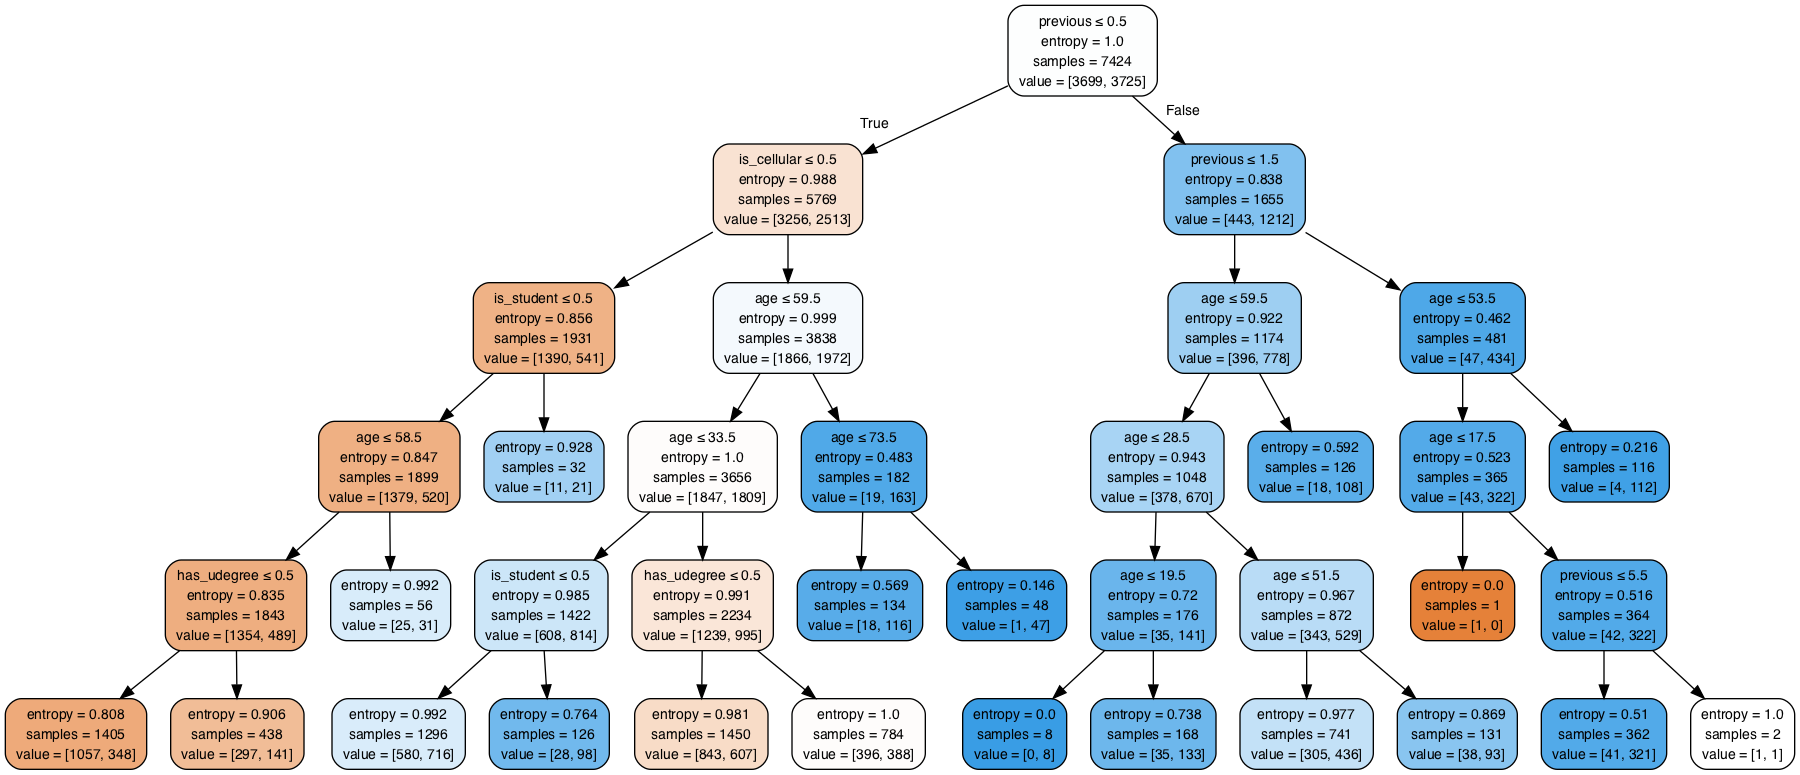

In [37]:
dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                feature_names=features,
                special_characters=True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

After model crection the results of decision tree did not change drastically. The only difference is that right now 
agreement decision is tightly connected to age. For example, if:
    * Person was previously contacted several times but less than 5 (1.5 <= previous <= 5.5)
    * Person's age is less than 53 but greater than 17 (17.5 <= age <= 53.5)
    Then probability of agreement is 88.6 %(249 out of 279).

In [54]:
pred_agree = dtree.predict(df_downsampled[features])

print(confusion_matrix(df_downsampled.y, pred_agree), '\n')
print('Accuracy:   %0.3f' % accuracy_score(df_downsampled.y, pred_agree))
print('Precision:  %0.3f' % precision_score(df_downsampled.y, pred_agree))
print('Recall:     %0.3f' % recall_score(df_downsampled.y, pred_agree))


[[2595 1104]
 [1485 2240]] 

Accuracy:   0.651
Precision:  0.670
Recall:     0.601


### Conclusion:  
New decision tree provides better results when it comes to predicting ageement class (probability is higher).
It also relies more on age and number of contacts rather than contact day of week as in he previous case.
Nevertheless, accuracy, precision, and recall values are almost identicall (what is not a surprice considering cross validation results).
Finally, Desicion tree proved to perform better in comparison to logistic regression even though the results are just moderate for both models.
Things to work on: 
Try other prediction models (ex: Random Forest or GBM).
Bring in more different features for analysis.
    